# **COMPUTER VISION**

## Images as Numerical Data

An image can be represented as a 2D function F(x,y) where x and y are specific coordinates. The amplitude of F at a aprticular value of x, y is known as the intensity of an image at that point. If x, y and the amplitude value is finite then we call it a digital image.

it is an array of pixels arranged in coloumn and rows. Pixels are the elements of an image that contain information about intensity and color. An image can aso be represented in 3D where x, y and z became spatial coordinates, Pixels are arranged in the form of a matrix. This is known as an **RGB** image

In [ ]:
import numpy as np
import matplotlib.image as mpimg  # for reading in image

import matplotlib.pyplot as plt
import cv2 # computer vision library / openCV

%matplotlib inline

Image Dimensions:  (2000, 2000, 3)


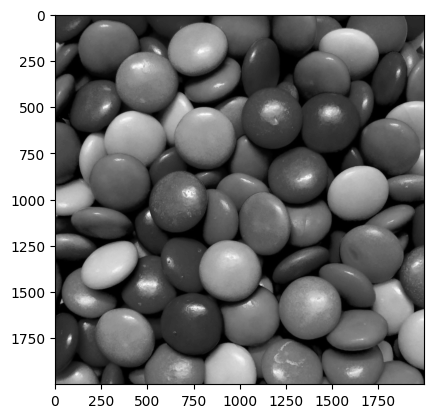

In [ ]:
# Read in the image
image = mpimg.imread('/content/sample_data/gems chocolate.jpg')

# Print out the Image Dimensions
print('Image Dimensions: ',image.shape)

# change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap ='gray')
plt.show()


In [ ]:
print('GRAY SCALE Image Dimensions: ',gray_image.shape)

GRAY SCALE Image Dimensions:  (2000, 2000)


In [ ]:
print(gray_image)

[[ 60  60  59 ...  43  43  43]
 [ 59  58  57 ...  43  43  42]
 [ 59  58  57 ...  43  43  42]
 ...
 [135 147 142 ...  31  20  15]
 [138 144 139 ...  34  22  18]
 [142 141 137 ...  33  22  18]]


In [ ]:
# Print specific greyscale pixel values
# What is the pixel value at x = 400 and y = 300
# Format is : [y,x]
print(gray_image[300, 400])

143


In [ ]:
# Find the maximum and minimum grayscale value in the image
max_value = np.amax(gray_image)
min_value = np.amin(gray_image)

print('Max : ',max_value)
print('Min : ',min_value)

Max :  255
Min :  0


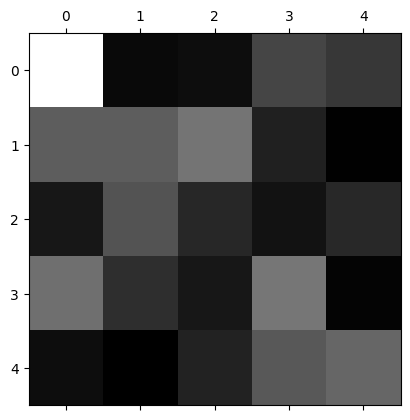

In [ ]:
# Create a 5x5 image using grayscale, numeric value
import numpy as np

tiny_image = np.array([
    [550, 20, 30, 150, 120],
    [200, 200, 250, 70, 3],
    [50, 180, 85, 40, 90],
    [240, 100, 50, 255, 10],
    [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
import matplotlib.pyplot as plt
plt.matshow(tiny_image, cmap = 'gray')





## Visualize RGB Colorspaces

In [ ]:
from google.colab.patches import cv2_imshow

%matplotlib inline

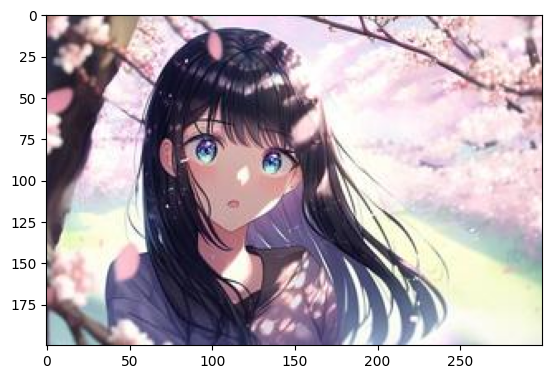

In [ ]:
# read in the image
image = mpimg.imread('/content/sample_data/anime images.jpg')

plt.imshow(image)

In [ ]:
print(image.shape)

(200, 300, 3)


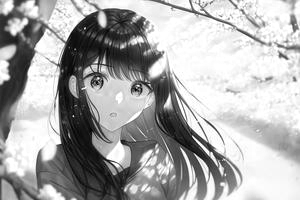

In [ ]:
blue_image = image [:, :, 0]
cv2_imshow(blue_image)

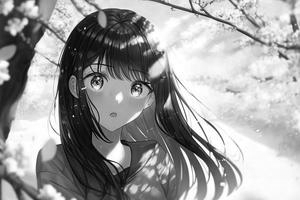

In [ ]:
green_image = image [:, :, 1]
cv2_imshow(green_image)

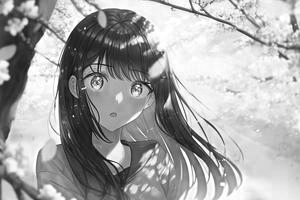

In [ ]:
red_image = image [:, :, 2]
cv2_imshow(red_image)

## HSV Image

Hue(H) Satturation (S) and Value (V)

* Hue channel contains information related to color
* Saturation channel comprises of the shades of the color
* Value stands for the intensity of the luminance.

The components of hue and saturation remain majorly indifferent to lighting conditions. The value component will change as per the lighting. Since in HSV color space sources of chrominance and luminance are separate, it became easier to perform color segmentation by specifying a threshold.


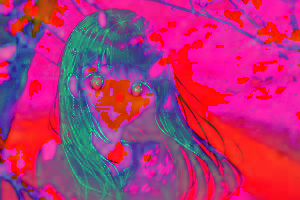

In [ ]:
 # Converting HSV Image
import cv2
image = cv2.imread('/content/sample_data/anime images.jpg')
HSV_Image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(HSV_Image)

## YCrCb COLORSPACE

Y stands for luma (intensity of luminance), Cr represents the red component after subtracting the luma component (R-Y) and similarly Cb represents the blue component after subtracting the luma component (B-Y).
THe distinct component of chroma of luma and chrominance aid in the effective separation of the colors, specifically, this color space works best for distinguishing the red and blue color from the image.

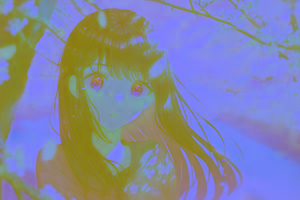

In [ ]:
# Converting YCrCb Image
image = cv2.imread('/content/sample_data/anime images.jpg')
YCrCb_Image = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
cv2_imshow(YCrCb_Image)

## LAB

This color space also encodes the information of luminance and chroma in separate channels

* The L channels corresponds to lightness (lighting intensity).
* The A and B components store color details, with the former consisting of color components ranging from green to magenta and the latter blue to yellow.

As mentioned the change in the illumination will affect the Y component. The A and B components will significantly show the difference of color information irrespective of the lighting condition.



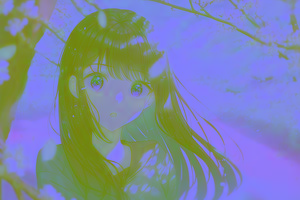

In [ ]:
# Converting LAB Image
Image = cv2.imread('/content/sample_data/anime images.jpg')
LAB_Image = cv2.cvtColor(Image, cv2.COLOR_BGR2LAB)
cv2_imshow(LAB_Image)

## Blurring

aka **SMOOTHEING** is an essential step in any image processing application.


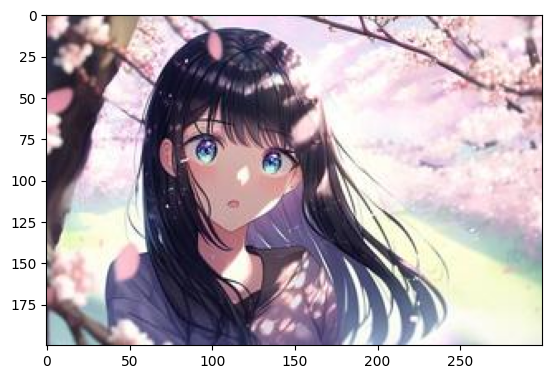

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the Image
image = cv2.imread('/content/sample_data/anime images.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color from RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

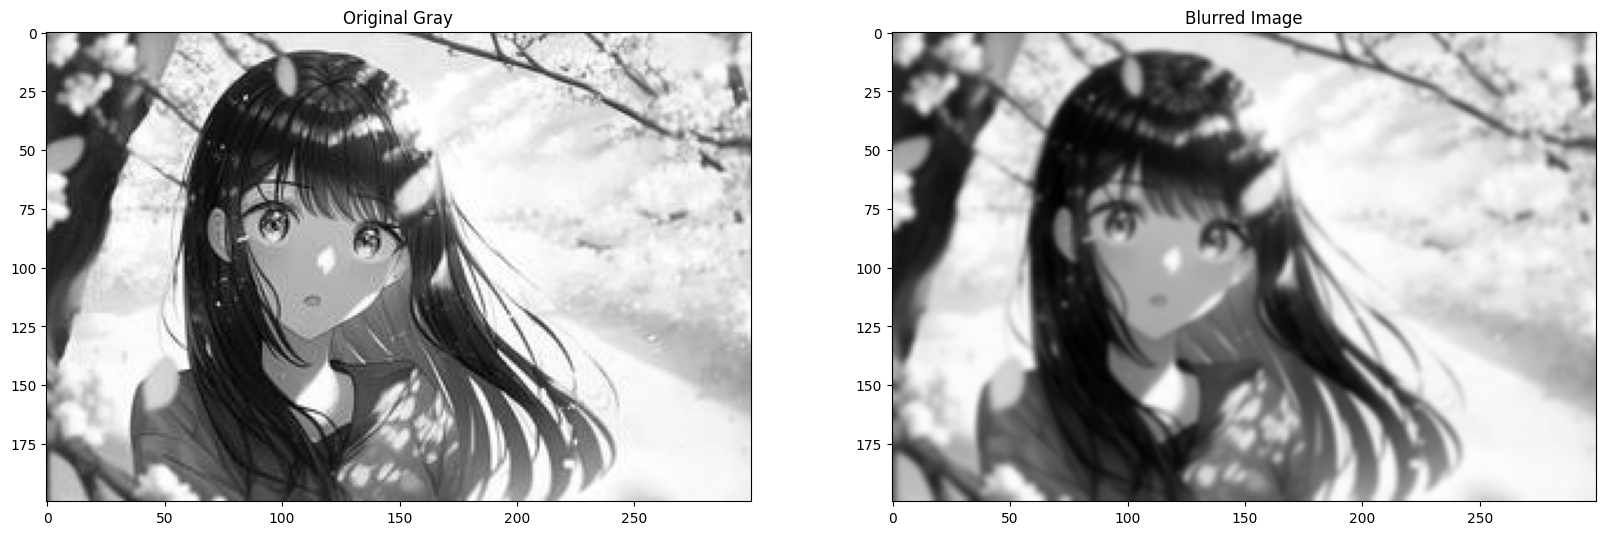

In [ ]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur = cv2.GaussianBlur(gray, (5,5), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.set_title('Original Gray')
ax1.imshow(gray, cmap = 'gray')

ax2.set_title('Blurred Image')
ax2.imshow(gray_blur, cmap = 'gray')


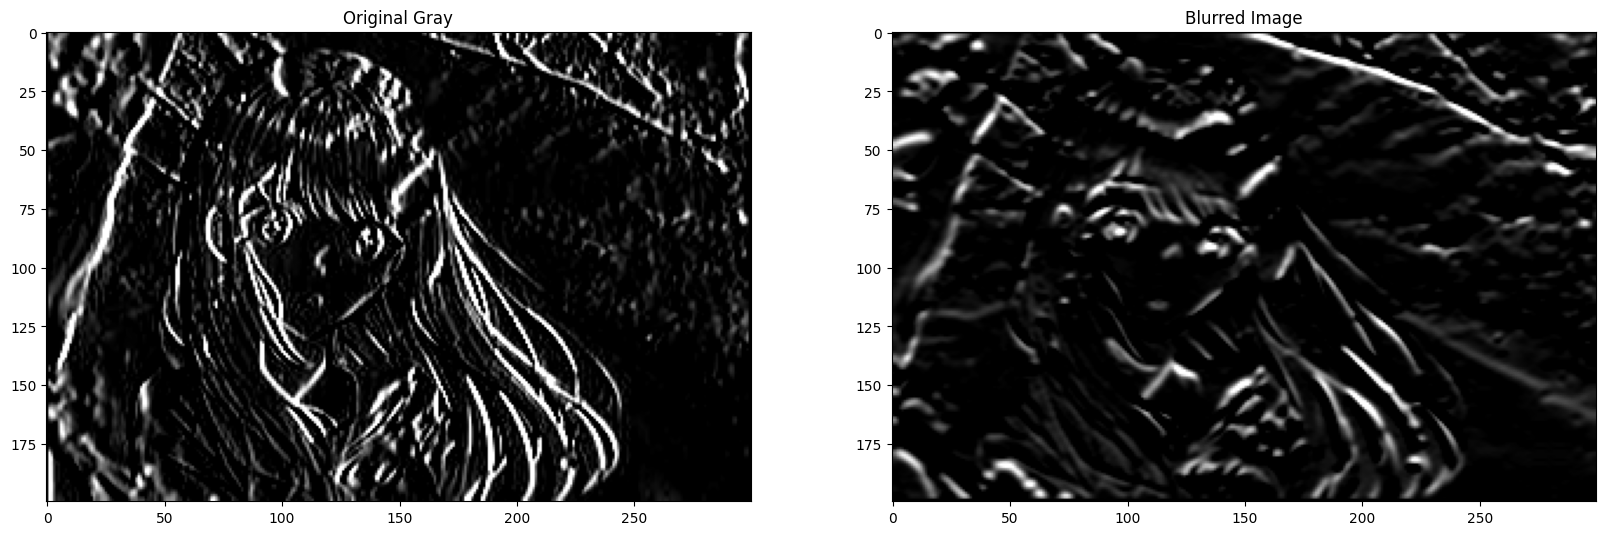

In [ ]:
# High Pass Filter

# 3x3 sobel filters for edge detection
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Filters the original and blurred grayscale image using filters 3D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Original Gray')
ax1.imshow(filtered, cmap = 'gray')

ax2.set_title('Blurred Image')
ax2.imshow(filtered_blurred, cmap = 'gray')

## Image Sharpening

Image Sharpening is just the opposite of blurring. It emphasises the variation in the neighbouring pixels so that edges look more vivid.
   

## Edge Detection

The detection of edges in an image enables us to identify the objects that are present. The edges are formed by a significant variation in the adjacent pixel intensities of an image.

## Canny Edge Detection

it is robust and highly efficient as it incorporate the Sobel filter method along with some post processing steps. It involves the following steps :-
* Noise Reduction
* Sobel Filtering
* Non Maimum Suppression
* Hysteresis Thresholding



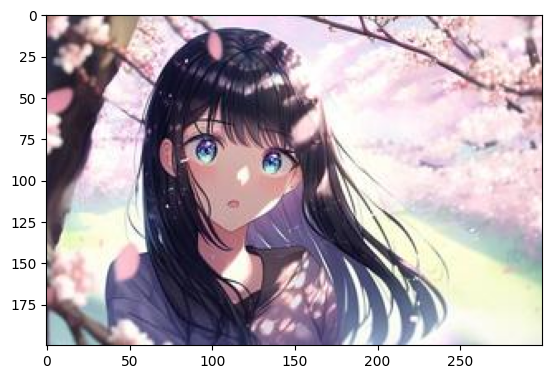

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('/content/sample_data/anime images.jpg')

# Changes color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

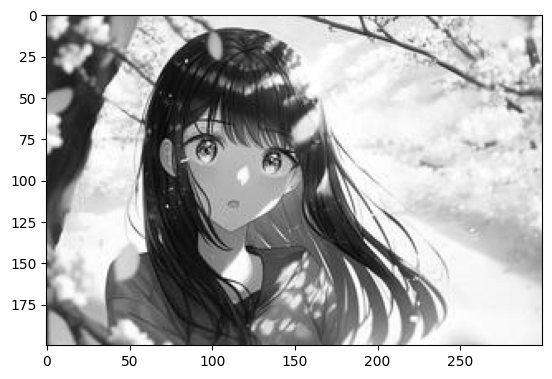

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

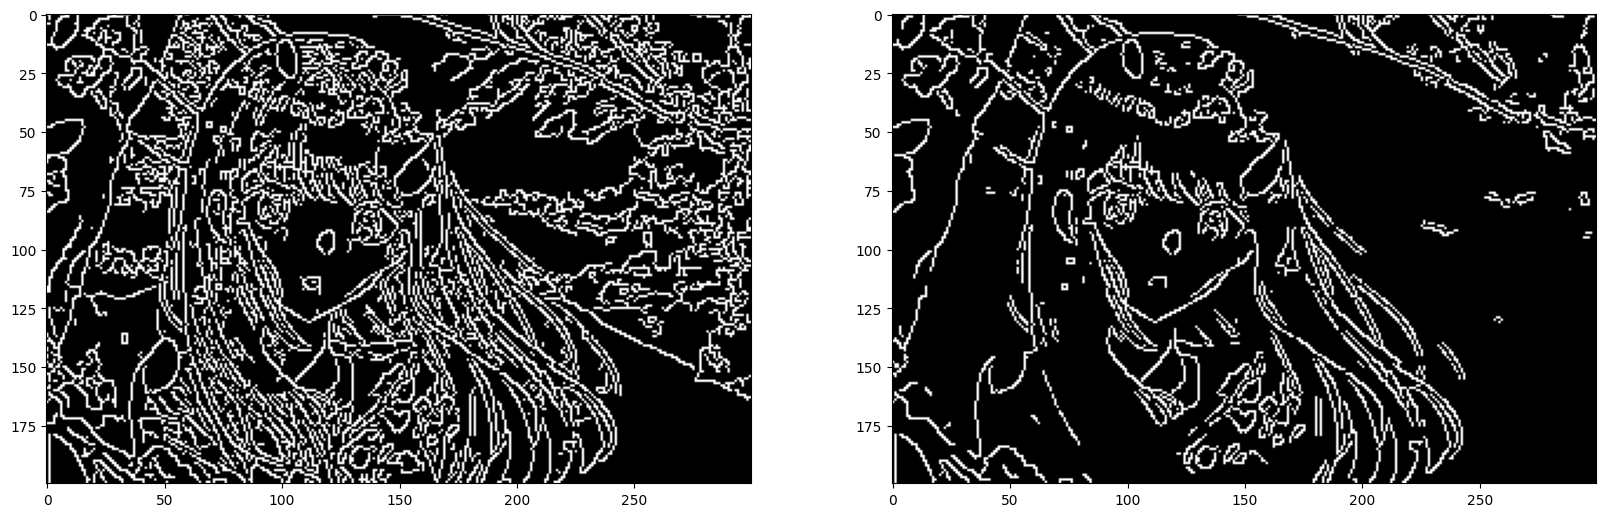

In [ ]:
wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title = ('wide')
ax1.imshow(wide, cmap = 'gray')

ax2.set_title = ('tight')
ax2.imshow(tight, cmap = 'gray')

## Convolutional Layer

<function matplotlib.pyplot.show(close=None, block=None)>

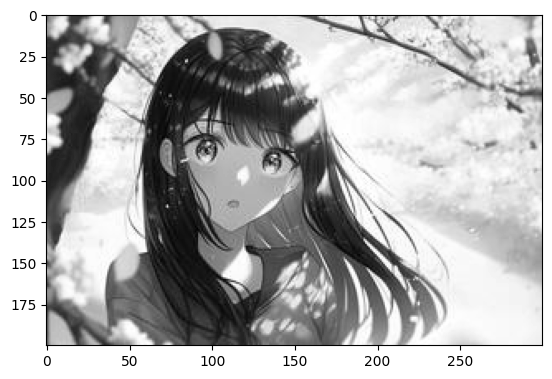

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# To a file path to another image on your computer
img_path = '/content/sample_data/anime images.jpg'

# load color image
bgr_img = cv2.imread(img_path)

# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0, 1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap = 'gray')
plt.show

In [ ]:
# define and visualise the filters
import numpy as np

filter_vals = np.array([[-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1],
                        [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [ ]:
# defining four different filters, for the sake of simplicity
# all of which are linear combinations of the 'filter_vals' defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_vals
# T-> transpose function
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

#for an example, print out the value of all filters
print('Filter 1: \n', filter_1)
print('\n')
print('Filter 2: \n', filter_2)
print('\n')
print('Filter 3: \n', filter_3)
print('\n')
print('Filter 4: \n', filter_4)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


Filter 2: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]]


Filter 3: 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]]


Filter 4: 
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


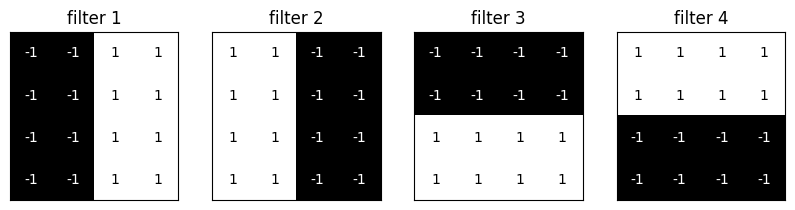

In [ ]:
# visualize all four filters
fig = plt.figure(figsize=(10,5))
for i in range(4):
  ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
  ax.imshow(filters[i], cmap = 'gray')
  ax.set_title('filter %s' % str(i+1))
  width, height = filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]), xy = (y,x),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  color='white' if filters[i][x][y]<0 else 'black')


In [ ]:
# developing a convolutional Layer.
# initialize a single convolutional Layer so that it contains all your created filters.
# NOTE you are not training this network.
# you are initailizing the weights in a convolutional layer so that you can
# visualize what happens after a forward pass through this network !
# REMEMBER: NO TRAINING !

import torch
import torch.nn as nn
import torch.nn.functional as F

# define a neural network with a convolutional layer with four filters
class Net(nn.Module):

     def __init__(self, weight):
      super(Net, self).__init__()
      # initialize the weights of the convolutional layer to be the weights of the 4 defined filters
      self.conv = nn.Conv2d(1, 4, kernel_size=3, padding=1, bias=False, padding_mode='reflect')
      self.conv.weight = nn.Parameter(weight)
      k_height, k_width = weight.shape[2:]
      # assume there are 4 grayscale filters
      self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias = False )
      self.conv.weight = torch.nn.Parameter(weight)

      def forward(self, x):
      # calculates the output of a convolutional layer
      # pre and post activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)

      # return both layers
        return conv_x, activated_x

# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [ ]:
# Visualize the output of each filter
# First, we'll define a helper function, 'vix.layer'
# that takes in a specific layer and number of filters (optical argument),
# and display the output of that layer once an image has been pass through.

# helper fuction for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters = 4):
  fig = plt.figure(figsize=(20,10))


  for i in range(n_filters):
     ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
     # grab layer outputs
     ax.imshow(np.squeeze(layer[0,1], data.numpy(), cmap = 'gray'))
     ax.set_title('Output %s' % str(i+1))

NotImplementedError: Module [Net] is missing the required "forward" function

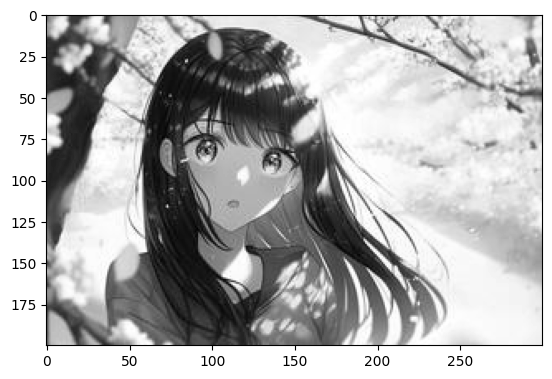

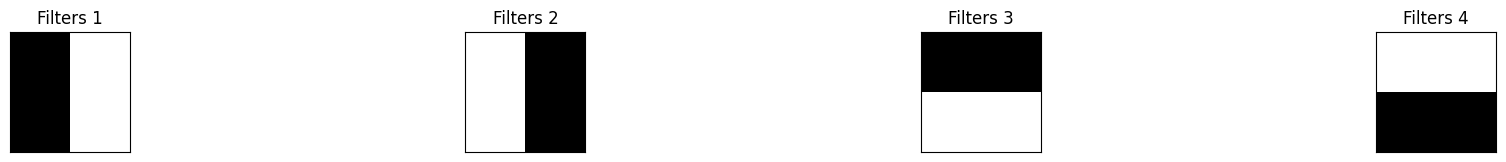

In [ ]:
# Let's look at the output of a convolutional layer, before and after a relu activation function is applied

# plot original image
plt.imshow(gray_img, cmap = 'gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
  ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
  ax.imshow(filters[i], cmap = 'gray')
  ax.set_title('Filters %s' % str(i+1))

# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)


In [ ]:
# after a relu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)


NameError: name 'activated_layer' is not defined